In [49]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn import linear_model, neural_network

(-0.05, 1.05, -2.429673225059337, 0.36626568037708174)

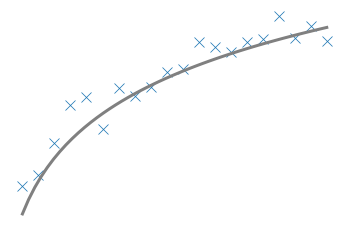

In [50]:
np.random.seed(0)

f = lambda x: np.log(x+0.1)
eps = 0.2

n = 20
x = np.linspace(0,1,n)
y = f(x) + eps*np.random.randn(n)

xt = np.linspace(0,1)
yt = f(xt) + eps*np.random.randn(xt.shape[0])
ybar = f(xt)

sns.scatterplot(x=x,y=y, s=100, marker='x')
sns.lineplot(x=xt,y=ybar, linewidth=3, color='gray')
plt.axis('off')

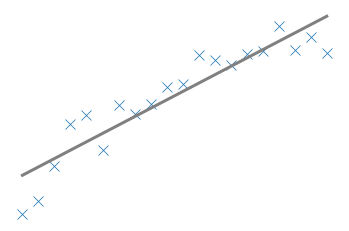

In [51]:
model = linear_model.LinearRegression()
model.fit(x.reshape(-1,1),y.reshape(-1,1))
yp = model.predict(xt.reshape(-1,1))

sns.scatterplot(x,y, s=100, marker='x')
sns.lineplot(xt,yp.reshape(-1), linewidth=3, color='gray')
plt.axis('off')
plt.savefig('bias_linear.pdf', bbox_inches='tight')

Iteration 1, loss = 0.48958075
Iteration 2, loss = 0.26870345
Iteration 3, loss = 0.20361261
Iteration 4, loss = 0.20035034
Iteration 5, loss = 0.18295156
Iteration 6, loss = 0.15087681
Iteration 7, loss = 0.13236907
Iteration 8, loss = 0.11636180
Iteration 9, loss = 0.09120518
Iteration 10, loss = 0.06337811
Iteration 11, loss = 0.04640807
Iteration 12, loss = 0.03635549
Iteration 13, loss = 0.02622534
Iteration 14, loss = 0.02668961
Iteration 15, loss = 0.03236111
Iteration 16, loss = 0.03126511
Iteration 17, loss = 0.02943480
Iteration 18, loss = 0.02658596
Iteration 19, loss = 0.02114951
Iteration 20, loss = 0.01862676
Iteration 21, loss = 0.02035262
Iteration 22, loss = 0.02245679
Iteration 23, loss = 0.02275119
Iteration 24, loss = 0.02172094
Iteration 25, loss = 0.01926185
Iteration 26, loss = 0.01666520
Iteration 27, loss = 0.01538190
Iteration 28, loss = 0.01541351
Iteration 29, loss = 0.01586232
Iteration 30, loss = 0.01629297
Iteration 31, loss = 0.01615722
Iteration 32, los

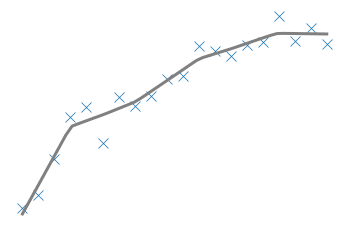

In [52]:
model = neural_network.MLPRegressor(hidden_layer_sizes=(2000,750,300,100), 
                                    verbose=True, 
                                    max_iter=1000, 
                                    learning_rate='adaptive', 
                                    n_iter_no_change=50)
model.fit(x.reshape(-1,1),y)
yp = model.predict(xt.reshape(-1,1))

sns.scatterplot(x,y, s=100, marker='x')
sns.lineplot(xt,yp.reshape(-1), linewidth=3, color='gray')
plt.axis('off')
plt.savefig('bias_neural.pdf', bbox_inches='tight')

# Find mean prediction

In [53]:
models = []
for _ in range(100): 
    x0 = np.random.uniform(0,1,n)
    y0 = f(x0) + eps*np.random.randn(n)

    model = linear_model.LinearRegression()
    model.fit(x0.reshape(-1,1),y0.reshape(-1,1))
    models.append(model)
    
def mu(x): 
    predictions = [m.predict(x.reshape(-1,1)) for m in models]
    return np.array(predictions).mean(0).reshape(-1)

yp = mu(xt)

# Calculate variance, bias, and noise

In [75]:
variances = []
predictions = []
n0 = 10
np.random.seed(0)
for _ in range(100): 
    x0 = np.random.uniform(0,1,n0)
    y0 = f(x0) + eps*np.random.randn(n0)

    model = linear_model.LinearRegression()
    model.fit(x0.reshape(-1,1),y0.reshape(-1,1))
    pred = model.predict(xt.reshape(-1,1)).reshape(-1)
    var0 = (pred - mu(xt))**2
    variances.append(var0)
    
var = np.array(variances).mean(0)
bias = (mu(xt) - ybar)**2
noise = (ybar - yt)**2
risk = (pred - yt)**2

var_frac = var/risk
bias_frac = bias/risk
noise_frac = noise/risk

In [76]:
(var + bias + noise).mean(), risk.mean()

(0.09687498011276414, 0.09546462516493395)

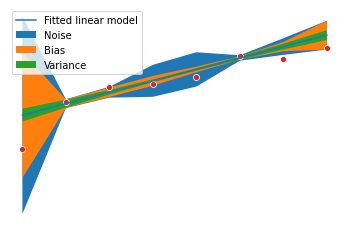

In [91]:
# s = 4
# xtt,ytt = xt[::s],yt[::s]

# filler(risk*1.5)
s = 7
def filler(yt,s=s, amp=4): 
    plt.fill_between(xt[::s],(pred+amp*np.abs(yt))[::s], (pred-amp*np.abs(yt))[::s])
# filler(noise + bias + var, s=s)
# filler(noise + bias, s=s)
# filler(noise, s=s)
filler(noise + bias + var, s=s)
filler(bias + var, s=s)
filler(var, s=s)

sns.lineplot(x=xt,y=pred.reshape(-1))
sns.scatterplot(x=xt[::s],y=yt[::s])

plt.legend(['Fitted linear model', 'Noise', 'Bias', 'Variance'])
plt.axis('off')
plt.savefig('bias_viz.pdf', bbox_inches='tight')